### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
def prediction_plot(predictions, Y_test):
    plt.figure(figsize=(6, 6))
    plt.scatter(predictions, Y_test, alpha=0.5)
    plt.xlabel('Predictions')
    plt.ylabel('Target')

In [3]:
auto_data = pd.read_csv("ford.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [4]:
X, Y = auto_data.drop(['price', 'model', 'transmission', 'fuelType'], axis=1), auto_data['price']

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

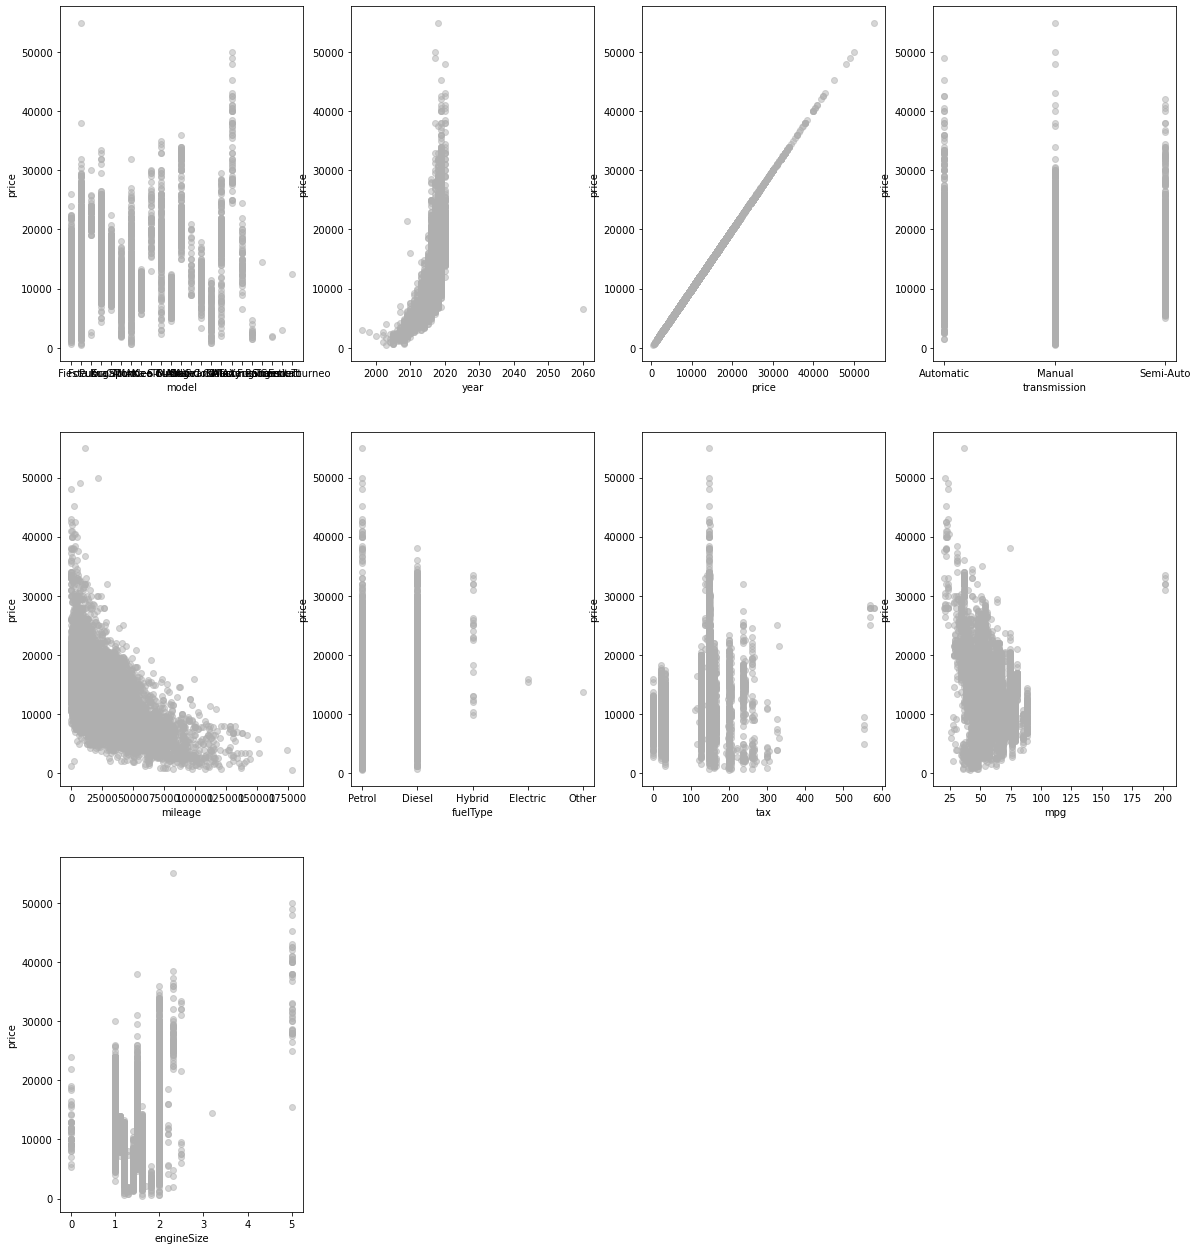

In [6]:
plt.figure(figsize=(20,30))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(auto_data[column], auto_data['price'], color='#afafaf', alpha = 0.5)
    plt.xlabel(column)
    plt.ylabel('price')

<AxesSubplot:>

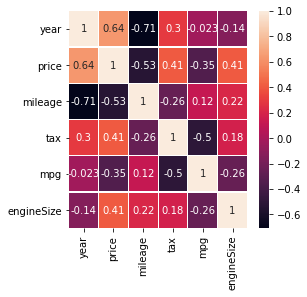

In [7]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(auto_data.corr(method='pearson'), annot = True, linewidths=0.2, ax=ax )

In [8]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [9]:
model = LassoCV(random_state=10)
model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)
print(round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3))
prediction_plot(predictions, Y_test)

1461.354


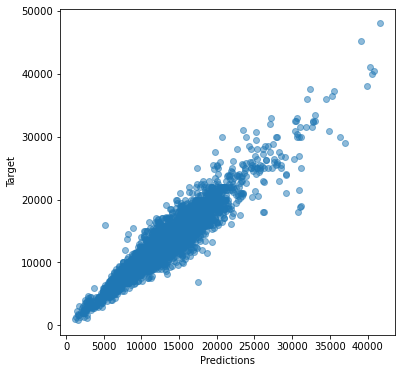

In [12]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3))
prediction_plot(predictions, Y_test)

In [13]:
auto_data = pd.read_csv("ford.csv")

auto_data['year'] = auto_data.year.clip(lower=auto_data.year.quantile(0.01))
auto_data['mileage'] = auto_data.price.clip(lower=auto_data.mileage.quantile(0.01),
                                            upper=auto_data.mileage.quantile(0.99))
                                                      
auto_data_dummy = pd.concat([auto_data.drop('transmission', axis=1),
                             pd.get_dummies(auto_data['transmission'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('model', axis=1), 
                             pd.get_dummies(auto_data_dummy['model'])], axis = 1)
auto_data_dummy = pd.concat([auto_data_dummy.drop('fuelType', axis=1), 
                             pd.get_dummies(auto_data_dummy['fuelType'])], axis = 1)

In [14]:
X, Y = auto_data_dummy.drop(['price'], axis=1), auto_data_dummy['price']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, shuffle = False)

In [15]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

5.201


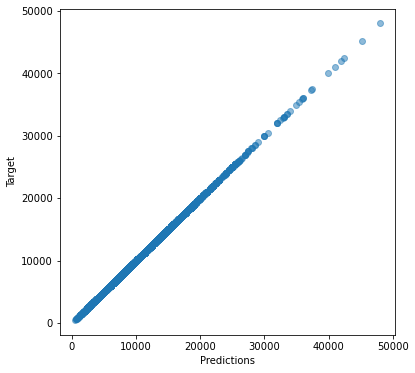

In [16]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3))
prediction_plot(predictions, Y_test)

272.684


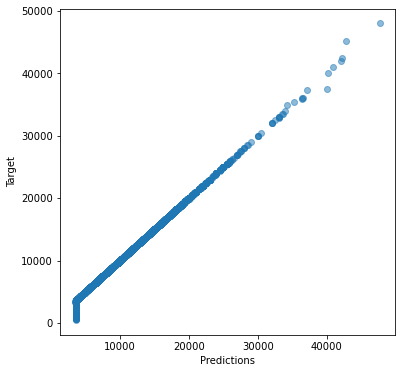

In [17]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3))
prediction_plot(predictions, Y_test)